# Case 5

The further the points away from the center, the worse the fit will be.

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, time
from tqdm import tqdm
import random

#import package
sys.path.extend(os.path.join(os.getcwd(),'Point_Geometry_Package'))

from Point_Geometry_Package.get_random_subsamples import get_random_subsamples
from Point_Geometry_Package.simulate_sinkhole_parameter_retrieval2 import simulate_sinkhole

In [2]:
def create_circular_dataset(num_r,r_filt):
    # Point on a circle with the same r
    R_circ = 600
    n_circ = 360
    theta = np.deg2rad(np.linspace(0,360,n_circ))
#     num_r = 150 #this will influence the number of points generated
    r_array_circ = np.linspace(r_filt,R_circ,num_r)

    #total number of points is nxn

    x_circ = np.array([])
    y_circ = np.array([])
    z_circ = np.array([])
    r_circ = np.array([])

    for item in r_array_circ:
        x_item = item*np.cos(theta)
        y_item = item*np.sin(theta)
        idx = random.sample(range(0,len(x_item)),1)
        x_circ = np.concatenate((x_circ,x_item[idx]))
        y_circ = np.concatenate((y_circ,y_item[idx]))
        r = np.sqrt((x_item**2)+(y_item**2))
        r_circ = np.concatenate((r_circ,r[idx]))
    #     z_circ = np.concatenate((z_circ,zg(R_circ,r)[idx]))
    
    return x_circ, y_circ, r_circ

Investigate 3 cases:
- No Points within a radius of 100 meters
- No Points within a radius of 250 meters
- No Points within a radius of 450 meters

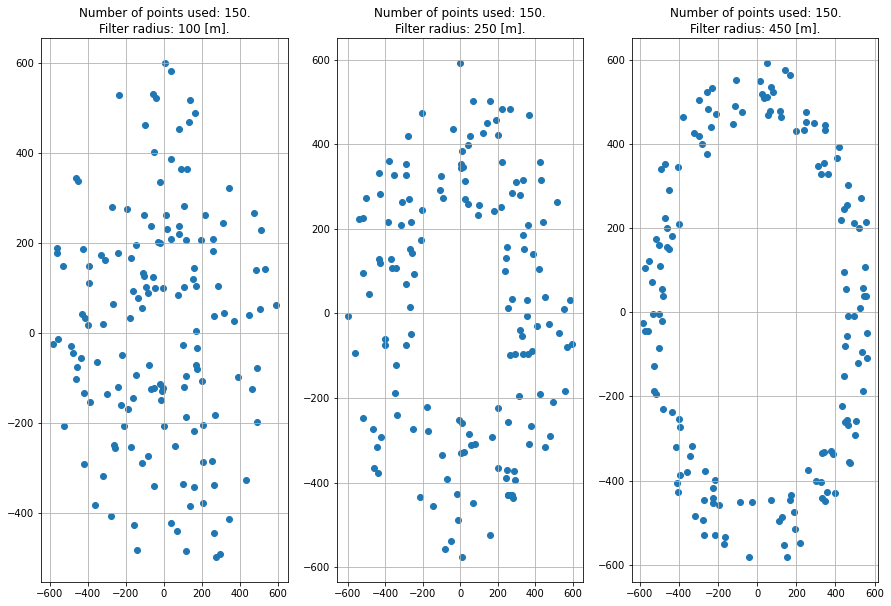

In [3]:
num_r = 150

r_filt1 = 100
r_filt2 = 250
r_filt3 = 450

x_circ1, y_circ1, r_circ1 = create_circular_dataset(num_r,r_filt1)
x_circ2, y_circ2, r_circ2 = create_circular_dataset(num_r,r_filt2)
x_circ3, y_circ3, r_circ3 = create_circular_dataset(num_r,r_filt3)

fig, ax = plt.subplots(ncols=3, figsize=(15,10))

ax[0].scatter(x_circ1,y_circ1)
ax[1].scatter(x_circ2,y_circ2)
ax[2].scatter(x_circ3,y_circ3)

ax[0].set_title(f'Number of points used: {len(x_circ1)}.' + '\n' + f'Filter radius: {r_filt1} [m].')
ax[1].set_title(f'Number of points used: {len(x_circ2)}.' + '\n'+ f'Filter radius: {r_filt2} [m].')
ax[2].set_title(f'Number of points used: {len(x_circ3)}.' + '\n'+ f'Filter radius: {r_filt3} [m].')

ax[0].grid(True);
ax[1].grid(True);
ax[2].grid(True);

In [4]:
x0 = 0
y0 = 0

max_subs = 100
n_sims = 100

In [5]:
obj_circ1 = simulate_sinkhole()
obj_circ1.x0 = x0
obj_circ1.y0 = y0
obj_circ1.max_subs = max_subs
obj_circ1.n_sims = n_sims
obj_circ1.x_unravel = x_circ1
obj_circ1.y_unravel = y_circ1

obj_circ1.simulate_sinkhole_parameter_retrieval()

Simulating:   0%|                                                                              | 0/100 [00:00<?, ?it/s]H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:64: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\zg.py:10: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-np.pi*(r**2/R**2))
H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:47: RuntimeWarning: overflow encountered in double_scalars
  A2 = ((2*v*t*np.pi*r**2)/(R**3))*zg(R,r)
Simulating:  37%|█████████████████████████▌                                           | 37/100 [01:31<02:35,  2.46s/it]H:\My Documents\Master_T

In [6]:
obj_circ2 = simulate_sinkhole()
obj_circ2.x0 = x0
obj_circ2.y0 = y0
obj_circ2.max_subs = max_subs
obj_circ2.n_sims = n_sims
obj_circ2.x_unravel = x_circ2
obj_circ2.y_unravel = y_circ2

obj_circ2.simulate_sinkhole_parameter_retrieval()

Simulating: 100%|████████████████████████████████████████████████████████████████████| 100/100 [04:32<00:00,  2.72s/it]


In [7]:
obj_circ3 = simulate_sinkhole()
obj_circ3.x0 = x0
obj_circ3.y0 = y0
obj_circ3.max_subs = max_subs
obj_circ3.n_sims = n_sims
obj_circ3.x_unravel = x_circ3
obj_circ3.y_unravel = y_circ3

obj_circ3.simulate_sinkhole_parameter_retrieval()

Simulating: 100%|████████████████████████████████████████████████████████████████████| 100/100 [29:15<00:00, 17.56s/it]


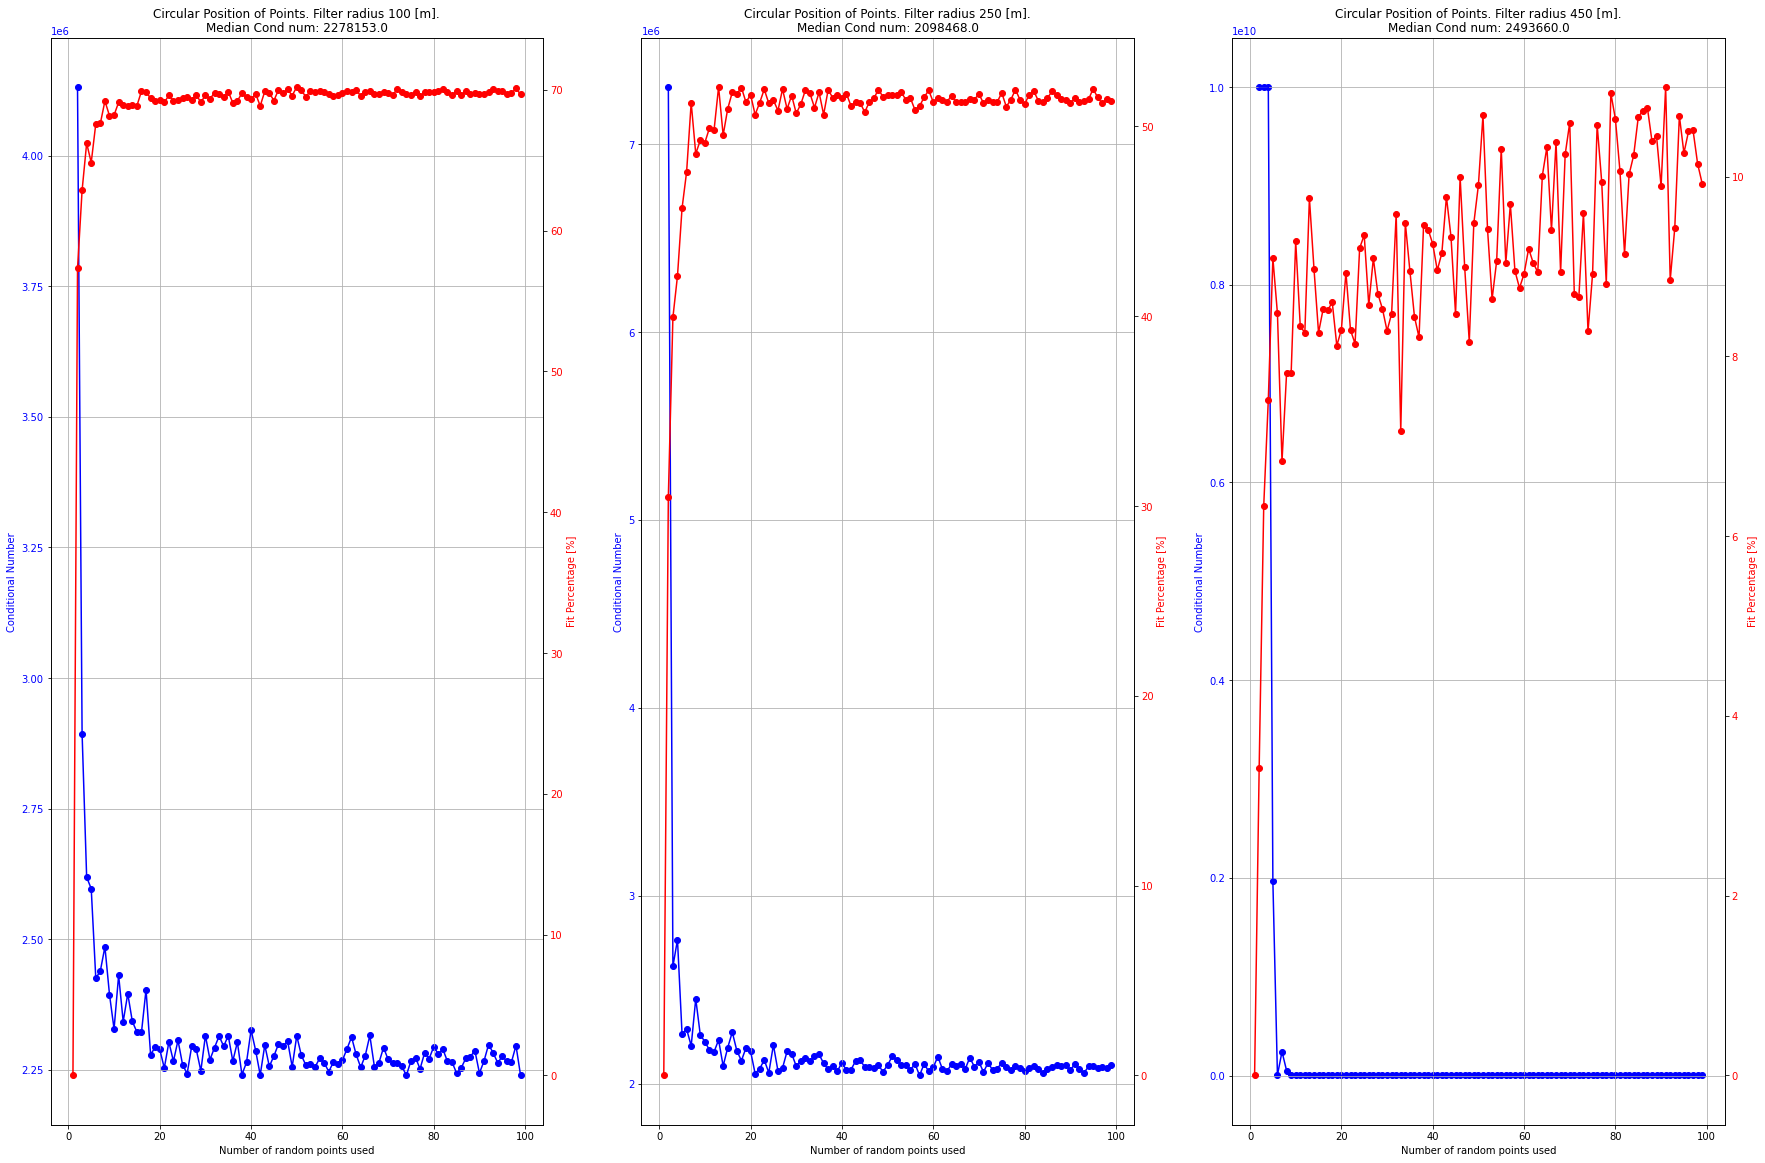

In [9]:
fig , ax = plt.subplots(ncols=3, figsize=(30,20))

#subcase 1
avg_cond_line1 = np.median(obj_circ1.cond_number_total_save,axis=0)
avg_data_line1 = np.sum(obj_circ1.fit_total_save,axis=0)/obj_circ1.n_sims

ax[0].plot(obj_circ1.number_subs[1:],avg_cond_line1[1:],c='b',label='Conditional Number')
ax[0].scatter(obj_circ1.number_subs[1:],avg_cond_line1[1:],c='b')
# ax1.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax[0].set_title(f'Circular Position of Points. Filter radius {r_filt1} [m].' + '\n' + f'Median Cond num: {np.round(np.median(avg_cond_line1[1:]))}')
ax[0].set_ylabel('Conditional Number',color='b')
ax[0].set_xlabel('Number of random points used')
ax[0].tick_params(axis='y', labelcolor='b')

ax2 = ax[0].twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj_circ1.number_subs,avg_data_line1,c='r',label='Model Fit')
ax2.scatter(obj_circ1.number_subs,avg_data_line1,c='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[0].grid(True)

#subcase 2
avg_cond_line2 = np.median(obj_circ2.cond_number_total_save,axis=0)
avg_data_line2 = np.sum(obj_circ2.fit_total_save,axis=0)/obj_circ2.n_sims

ax[1].plot(obj_circ2.number_subs[1:],avg_cond_line2[1:],c='b',label='Conditional Number')
ax[1].scatter(obj_circ2.number_subs[1:],avg_cond_line2[1:],c='b')
# ax1.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax[1].set_title(f'Circular Position of Points. Filter radius {r_filt2} [m].' + '\n' + f'Median Cond num: {np.round(np.median(avg_cond_line2[1:]))}')
ax[1].set_ylabel('Conditional Number',color='b')
ax[1].set_xlabel('Number of random points used')
ax[1].tick_params(axis='y', labelcolor='b')

ax2 = ax[1].twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj_circ2.number_subs,avg_data_line2,c='r',label='Model Fit')
ax2.scatter(obj_circ2.number_subs,avg_data_line2,c='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[1].grid(True)

#subcase 3
avg_cond_line3 = np.median(obj_circ3.cond_number_total_save,axis=0)
avg_data_line3 = np.sum(obj_circ3.fit_total_save,axis=0)/obj_circ3.n_sims

ax[2].plot(obj_circ3.number_subs[1:],avg_cond_line3[1:],c='b',label='Conditional Number')
ax[2].scatter(obj_circ3.number_subs[1:],avg_cond_line3[1:],c='b')
# ax1.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax[2].set_title(f'Circular Position of Points. Filter radius {r_filt3} [m].' + '\n' + f'Median Cond num: {np.round(np.median(avg_cond_line3[1:]))}')
ax[2].set_ylabel('Conditional Number',color='b')
ax[2].set_xlabel('Number of random points used')
ax[2].tick_params(axis='y', labelcolor='b')

ax2 = ax[2].twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj_circ3.number_subs,avg_data_line3,c='r',label='Model Fit')
ax2.scatter(obj_circ3.number_subs,avg_data_line3,c='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[2].grid(True)

# Conclusions
- The further away the points lie, the worse the fit gets and the higher the conditional number gets.
- Less points in the center will produce less to no errors such as Overflow or RunTimeWarnings.
- The conditional number has a convergence value for each radius